# CS 2302 - Quiz 10 - Graphs 1


## **Before you start**

Make a copy of this Colab by clicking on File > Save a Copy in Drive


In [ ]:
student_name = "Salvador Robles Herrera"
student_id = "80683116"

### [10 points] Problem 1

Write/draw the adjacency list, adjacency matrix, and edge list representation of the following graph:

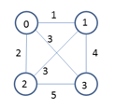



Adjacency list:

0 -> [[1,1], [3,3], [2,2]]

1 -> [[0,1], [2,3], [3,4]]

2 -> [[0,2], [1,3], [3,5]]

3 -> [[0,3], [1,4], [2,5]]

Adjacency matrix:

[x,1,2,3]

[1,x,3,4]

[2,3,x,5]

[3,4,5,x]

Edge list:

[0,1,1] [1,3,4] [3,2,5] [2,0,2] [0,3,3] [1,2,3]

### [10 points] Problem 2

Write/draw the adjacency list, adjacency matrix, and edge list representation of the following graph:


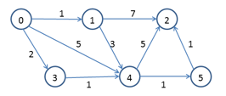

Adjacency list:

0 -> [[1,1], [3,2], [4,5]]

1 -> [[2,7], [4,3]]

2 -> []

3 -> [[4,1]]

4 -> [[2,5], [5,1]]

5 -> [[2,1]]

Adjacency matrix:

[x,1,x,2,5,x]

[x,x,7,x,3,x]

[x,x,x,x,x,x]

[x,x,x,x,1,x]

[x,x,5,x,x,1]

[x,x,1,x,x,x]

Edge list:

[0,1,1] [1,2,7] [0,4,5] [0,3,2] [3,4,1] [1,4,3] [4,2,5] [4,5,1] [5,2,1]

### [8 points] Problem 3

Implement a method called get_highest_cost_edge. This method should return the cost of the edge with the highest cost in the graph. Add this method to both GraphAM and GraphAL

### [8 points] Problem 4

Implement a method called num_edges. This method should return the number of edges in the graph. Add this method to both GraphAM and GraphAL

### [8 points] Problem 5
Implement a method called edge_weight. This method should receive parameters src and dest and return the weight/cost from src to dest. Add this method to both GraphAM and GraphAL



### [8 points] Problem 6
Implement a method called reverse_edges. This method should receive reverse the direction of all edges in the graph. Add this method to both GraphAM and GraphAL. Only do this if the graph is directed.

### [8 points] Problem 7

Complete the implementation of the is_identical method in the GraphAM class. This method returns True if and onlye if, the input graph of type GraphAM is equal to the graph represented by self.am.



### [8 points] Problem 8

A self-edge is an edge that starts and ends in the same vertex. Write a method called num_of_self_edges that returns the number of self-edges that the graph contains. Add this method to both GraphAM and GraphAL



### [8 points] Problem 9

The complement of a graph G = (V,E) is the graph G’=(V,E’) where an edge (u,v), for all u ≠ v, belongs to E’ if and only if it does not belong to E. Add this functionality in the form of a method called get_complement to the GraphAM class. G' should also be an instance of GraphAM.



### [8 points] Problem 10

A graph G1 = (V1,E1) is a subgraph of G2=(V2,E2) if V1 is a subset of V2 and E1 is a subset of E2. Write a method that receives a graph G1 represented as an adjacency list and another graph G2 represented as an adjacency matrix and determines is G1 is a subgraph of G2.

### [8 points] Problem 11
Implement a method called contains_cyle. This method should return True if and only if the graph contains a cycle. Add this method to both GraphAM and GraphAL (Hint: Is there a data structure that can make it easier for you to do this?). Feel free to solve this just for directed graphs.

### [8 points] Problem 12
An isolated vertex is a vertex with no ingoing or outgoing edges. Write a method called is_isolated that receives a vertex v and determines if v is an isolated vertex in the graph. Add this method to both GraphAM and GraphAL

### Adjacency List Representation



[[(1,1)(2,1)] [(0,1)(2,1)(4,1)] [(0,1)(1,1)(3,1)] [(2,1)(4,1)] [(3,1)(1,1)] [] ]


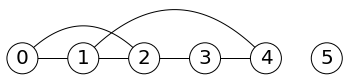

[[(1,1)(2,1)] [(0,1)(4,1)] [(0,1)(3,1)] [(2,1)(4,1)] [(3,1)(1,1)] [] ]


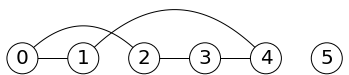

[[(1,1)(2,1)] [(2,1)] [(3,1)] [(4,1)] [(1,1)] [] ]


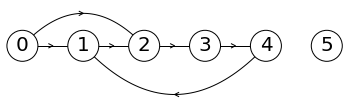

[[(1,1)(2,1)] [] [(3,1)] [(4,1)] [(1,1)] [] ]


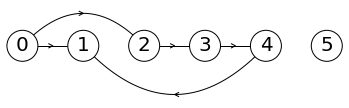

[[(1,4)(2,3)] [(0,4)(2,2)(4,4)] [(0,3)(1,2)(3,1)] [(2,1)(4,5)] [(3,5)(1,4)] [] ]


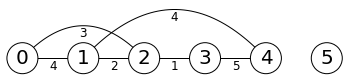

[[(1,4)(2,3)] [(0,4)(4,4)] [(0,3)(3,1)] [(2,1)(4,5)] [(3,5)(1,4)] [] ]


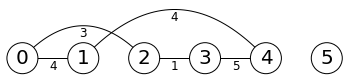

[[(1,4)(2,3)] [(2,2)] [(3,1)] [(4,5)] [(1,4)] [] ]


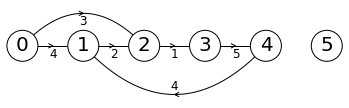

[[(1,4)(2,3)] [] [(3,1)] [(4,5)] [(1,4)] [] ]


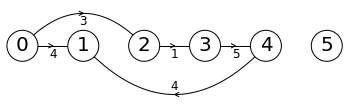

In [103]:
from scipy.interpolate import interp1d


class Edge:
    def __init__(self, dest, weight=1):
        self.dest = dest
        self.weight = weight


class GraphAL:
    # Constructor
    def __init__(self, vertices, weighted=False, directed=False):
        self.al = [[] for i in range(vertices)]
        self.weighted = weighted
        self.directed = directed
        self.representation = 'AL'

    def is_valid_vertex(self, u):
        return 0 <= u < len(self.al)

    def insert_vertex(self):
        self.al.append([])

        return len(self.al) - 1  # Return id of new vertex

    def insert_edge(self, source, dest, weight=1):
        if not self.is_valid_vertex(source) or not self.is_valid_vertex(dest):
            print('Error, vertex number out of range')
        elif weight != 1 and not self.weighted:
            print('Error, inserting weighted edge to unweighted graph')
        else:
            self.al[source].append(Edge(dest, weight))
            if not self.directed:
                self.al[dest].append(Edge(source, weight))

    def delete_edge(self, source, dest):
        if source >= len(self.al) or dest >= len(self.al) or source < 0 or dest < 0:
            print('Error, vertex number out of range')
        else:
            deleted = self._delete_edge(source, dest)
            if not self.directed:
                deleted = self._delete_edge(dest, source)
            if not deleted:
                print('Error, edge to delete not found')

    def _delete_edge(self, source, dest):
        i = 0
        for edge in self.al[source]:
            if edge.dest == dest:
                self.al[source].pop(i)
                return True
            i += 1
        return False

    def num_vertices(self):
        return len(self.al)

    #PROBLEM 3
    def get_highest_cost_edge(self):
        highest = 0
        for i in range(len(self.al)):
          for j in range(len(self.al[i])):
            if self.al[i][j].weight > highest:
              highest = self.al[i][j].weight
        return highest

    #PROBLEM 4
    def num_edges(self):
        edges = 0
        for i in range(len(self.al)):
          for j in range(len(self.al[i])):
            edges += 1
        if self.directed:
          return edges
        return edges//2

    #PROBLEM 5
    def edge_weight(self, src, dest):
        for i in range(len(self.al[src])):
          if self.al[src][i].dest == dest:
            return self.al[src][i].weight

    #PROBLEM 6
    def reverse_edges(self):
        if self.directed:
          al2 = [[] for i in range(len(self.al))]
          for i in range(len(self.al)):
            for j in range(len(self.al[i])):
              edge = Edge(i,self.al[i][j].weight)
              al2[self.al[i][j].dest].append(edge)
          self.al = al2

    #PROBLEM 8
    def num_of_self_edges(self):
        num = 0
        for i in range(len(self.al)):
          for j in range(len(self.al[i])):
            if self.al[i][j].dest == i:
              if self.al[i][j].weight != 0:
                num += 1
        return num

    #PROBLEM 12
    def is_isolated(self, v):
        if len(self.al[v]) != 0:
          return False
        for i in range(len(self.al)):
          for j in range(len(self.al[i])):
            if self.al[i][j].dest == v:
              return False
        return True    
        

    def display(self):
        print('[', end='')
        for i in range(len(self.al)):
            print('[', end='')
            for edge in self.al[i]:
                print('(' + str(edge.dest) + ',' + str(edge.weight) + ')', end='')
            print(']', end=' ')
        print(']')

    def draw(self):
        scale = 30
        fig, ax = plt.subplots()
        for i in range(len(self.al)):
            for edge in self.al[i]:
                d, w = edge.dest, edge.weight
                if self.directed or d > i:
                    x = np.linspace(i * scale, d * scale)
                    x0 = np.linspace(i * scale, d * scale, num=5)
                    diff = np.abs(d - i)
                    if diff == 1:
                        y0 = [0, 0, 0, 0, 0]
                    else:
                        y0 = [0, -6 * diff, -8 * diff, -6 * diff, 0]
                    f = interp1d(x0, y0, kind='cubic')
                    y = f(x)
                    s = np.sign(i - d)
                    ax.plot(x, s * y, linewidth=1, color='k')
                    if self.directed:
                        xd = [x0[2] + 2 * s, x0[2], x0[2] + 2 * s]
                        yd = [y0[2] - 1, y0[2], y0[2] + 1]
                        yd = [y * s for y in yd]
                        ax.plot(xd, yd, linewidth=1, color='k')
                    if self.weighted:
                        xd = [x0[2] + 2 * s, x0[2], x0[2] + 2 * s]
                        yd = [y0[2] - 1, y0[2], y0[2] + 1]
                        yd = [y * s for y in yd]
                        ax.text(xd[2] - s * 2, yd[2] + 3 * s, str(w), size=12, ha="center", va="center")
            ax.plot([i * scale, i * scale], [0, 0], linewidth=1, color='k')
            ax.text(i * scale, 0, str(i), size=20, ha="center", va="center",
                    bbox=dict(facecolor='w', boxstyle="circle"))
        ax.axis('off')
        ax.set_aspect(1.0)
        plt.show()


import matplotlib.pyplot as plt
import numpy as np


if __name__ == "__main__":
    plt.close("all")
    g = GraphAL(6)
    g.insert_edge(0, 1)
    g.insert_edge(0, 2)
    g.insert_edge(1, 2)
    g.insert_edge(2, 3)
    g.insert_edge(3, 4)
    g.insert_edge(4, 1)
    g.display()
    g.draw()
    g.delete_edge(1, 2)
    g.display()
    g.draw()

    g = GraphAL(6, directed=True)
    g.insert_edge(0, 1)
    g.insert_edge(0, 2)
    g.insert_edge(1, 2)
    g.insert_edge(2, 3)
    g.insert_edge(3, 4)
    g.insert_edge(4, 1)
    g.display()
    g.draw()
    g.delete_edge(1, 2)
    g.display()
    g.draw()

    g = GraphAL(6, weighted=True)
    g.insert_edge(0, 1, 4)
    g.insert_edge(0, 2, 3)
    g.insert_edge(1, 2, 2)
    g.insert_edge(2, 3, 1)
    g.insert_edge(3, 4, 5)
    g.insert_edge(4, 1, 4)
    g.display()
    g.draw()
    g.delete_edge(1, 2)
    g.display()
    g.draw()

    g = GraphAL(6, weighted=True, directed=True)
    g.insert_edge(0, 1, 4)
    g.insert_edge(0, 2, 3)
    g.insert_edge(1, 2, 2)
    g.insert_edge(2, 3, 1)
    g.insert_edge(3, 4, 5)
    g.insert_edge(4, 1, 4)
    g.display()
    g.draw()
    g.delete_edge(1, 2)
    g.display()
    g.draw()



### Adjacency Matrix Representation


[[(1,1)(2,1)] [(0,1)(2,1)(4,1)] [(0,1)(1,1)(3,1)] [(2,1)(4,1)] [(1,1)(3,1)] [] ]


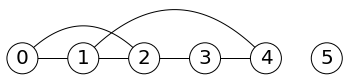

[[(1,1)(2,1)] [(0,1)(4,1)] [(0,1)(3,1)] [(2,1)(4,1)] [(1,1)(3,1)] [] ]


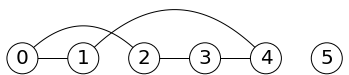

[[(1,1)(2,1)] [(2,1)] [(3,1)] [(4,1)] [(1,1)] [] ]


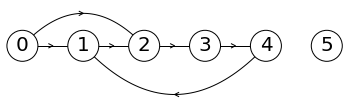

[[(1,1)(2,1)] [] [(3,1)] [(4,1)] [(1,1)] [] ]


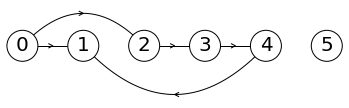

[[(1,4)(2,3)] [(0,4)(2,2)(4,4)] [(0,3)(1,2)(3,1)] [(2,1)(4,5)] [(1,4)(3,5)] [] ]


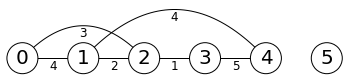

[[(1,4)(2,3)] [(0,4)(4,4)] [(0,3)(3,1)] [(2,1)(4,5)] [(1,4)(3,5)] [] ]


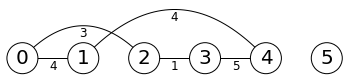

[[(1,4)(2,3)] [(2,2)] [(3,1)] [(4,5)] [(1,4)] [] ]


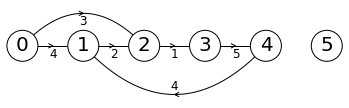

[[(1,4)(2,3)] [] [(3,1)] [(4,5)] [(1,4)] [] ]


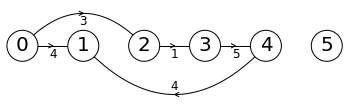

In [106]:
from scipy.interpolate import interp1d


class GraphAM:

    def __init__(self, vertices, weighted=False, directed=False):
        self.am = []

        for i in range(vertices):  # Assumption / Design Decision: 0 represents non-existing edge
            self.am.append([0] * vertices)

        self.directed = directed
        self.weighted = weighted
        self.representation = 'AM'

    def is_valid_vertex(self, u):
        return 0 <= u < len(self.am)

    def insert_vertex(self):
        for lst in self.am:
            lst.append(0)

        new_row = [0] * (len(self.am) + 1)  # Assumption / Design Decision: 0 represents non-existing edge
        self.am.append(new_row)

        return len(self.am) - 1  # Return new vertex id

    def insert_edge(self, src, dest, weight=1):
        if not self.is_valid_vertex(src) or not self.is_valid_vertex(dest):

            return

        self.am[src][dest] = weight

        if not self.directed:
            self.am[dest][src] = weight

    def delete_edge(self, src, dest):
        self.insert_edge(src, dest, 0)

    def num_vertices(self):
        return len(self.am)

    #PROBLEM 3
    def get_highest_cost_edge(self):
        highest = 0
        for i in range(len(self.am)):
          for j in range(len(self.am[i])):
            if self.am[i][j] > highest:
              highest = self.am[i][j]
        return highest

    #PROBLEM 4
    def num_edges(self):
        edges = 0
        for i in range(len(self.am)):
          for j in range(len(self.am[i])):
            if self.am[i][j] > 0:
              edges += 1
        if self.directed:
          return edges
        return edges//2

    #PROBLEM 5
    def edge_weight(self, src, dest):
        return self.am[src][dest]

    #PROBLEM 6
    def reverse_edges(self):
        if self.directed:
          am2 = []
          for i in range(len(self.am)): 
            temp = [] 
            for elem in self.am[i]: 
              temp.append(elem) 
            am2.append(temp) 

          for i in range(len(self.am)):
            for j in range(len(self.am[i])):
              am2[j][i] = self.am[i][j]
          self.am = am2

    #PROBLEM 7
    def is_identical(self, graphAM):
        if len(self.am) != len(graphAM.am):
          return False
        for i in range(len(self.am)):
          if len(self.am[i]) != len(graphAM.am[i]):
            return False
          for j in range(len(self.am[i])):
            if self.am[i][j] != graphAM.am[i][j]:
              return False
        return True


    #PROBLEM 8
    def num_of_self_edges(self):
        num = 0
        for i in range(len(self.am)):
          if self.am[i][i] != 0:
            num += 1
        return num

    
    #PROBLEM 9
    def get_complement(self):
      graph = GraphAL(len(self.am), self.am.weighted, self.am.directed)
      #for i in range(len(self.am)):
        #for j in range(len(self.am[i])):

      return graph

    #PROBLEM 12
    def is_isolated(self, v):
        for i in range(len(self.am)):
          if self.am[i][v] != 0:
            return False
        return True  



    def display(self):
        print('[', end='')
        for i in range(len(self.am)):
            print('[', end='')
            for j in range(len(self.am[i])):
                edge = self.am[i][j]
                if edge != 0:
                    print('(' + str(j) + ',' + str(edge) + ')', end='')
            print(']', end=' ')
        print(']')

    def draw(self):
        scale = 30
        fig, ax = plt.subplots()
        for i in range(len(self.am)):
            for j in range(len(self.am[i])):
                edge = self.am[i][j]

                if edge != 0:
                    d, w = j, edge
                    if self.directed or d > i:
                        x = np.linspace(i * scale, d * scale)
                        x0 = np.linspace(i * scale, d * scale, num=5)
                        diff = np.abs(d - i)
                        if diff == 1:
                            y0 = [0, 0, 0, 0, 0]
                        else:
                            y0 = [0, -6 * diff, -8 * diff, -6 * diff, 0]
                        f = interp1d(x0, y0, kind='cubic')
                        y = f(x)
                        s = np.sign(i - d)
                        ax.plot(x, s * y, linewidth=1, color='k')
                        if self.directed:
                            xd = [x0[2] + 2 * s, x0[2], x0[2] + 2 * s]
                            yd = [y0[2] - 1, y0[2], y0[2] + 1]
                            yd = [y * s for y in yd]
                            ax.plot(xd, yd, linewidth=1, color='k')
                        if self.weighted:
                            xd = [x0[2] + 2 * s, x0[2], x0[2] + 2 * s]
                            yd = [y0[2] - 1, y0[2], y0[2] + 1]
                            yd = [y * s for y in yd]
                            ax.text(xd[2] - s * 2, yd[2] + 3 * s, str(w), size=12, ha="center", va="center")
            ax.plot([i * scale, i * scale], [0, 0], linewidth=1, color='k')
            ax.text(i * scale, 0, str(i), size=20, ha="center", va="center",
                    bbox=dict(facecolor='w', boxstyle="circle"))
        ax.axis('off')
        ax.set_aspect(1.0)
        plt.show()


import matplotlib.pyplot as plt
import numpy as np

if __name__ == "__main__":
    plt.close("all")
    g = GraphAM(6)
    g.insert_edge(0, 1)
    g.insert_edge(0, 2)
    g.insert_edge(1, 2)
    g.insert_edge(2, 3)
    g.insert_edge(3, 4)
    g.insert_edge(4, 1)
    g.display()
    g.draw()
    g.delete_edge(1, 2)
    g.display()
    g.draw()

    g = GraphAM(6, directed=True)
    g.insert_edge(0, 1)
    g.insert_edge(0, 2)
    g.insert_edge(1, 2)
    g.insert_edge(2, 3)
    g.insert_edge(3, 4)
    g.insert_edge(4, 1)
    g.display()
    g.draw()
    g.delete_edge(1, 2)
    g.display()
    g.draw()

    g = GraphAM(6, weighted=True)
    g.insert_edge(0, 1, 4)
    g.insert_edge(0, 2, 3)
    g.insert_edge(1, 2, 2)
    g.insert_edge(2, 3, 1)
    g.insert_edge(3, 4, 5)
    g.insert_edge(4, 1, 4)
    g.display()
    g.draw()
    g.delete_edge(1, 2)
    g.display()
    g.draw()

    g = GraphAM(6, weighted=True, directed=True)
    g.insert_edge(0, 1, 4)
    g.insert_edge(0, 2, 3)
    g.insert_edge(1, 2, 2)
    g.insert_edge(2, 3, 1)
    g.insert_edge(3, 4, 5)
    g.insert_edge(4, 1, 4)
    g.display()
    g.draw()
    g.delete_edge(1, 2)
    g.display()
    g.draw()


Test your solutions by calling them multiple times with different input values and comparing the output produced by your methods to the expected outputs. For each test, add a short comment explaining why you think that test is appropiate. Do not write an excesive amount of tests; just write the number of tests you think you need and justify your decisions. 

AAAAAAAAAALLLLLLLLLL
[[(1,1)(2,1)] [(0,1)(2,1)(4,1)] [(0,1)(1,1)(3,1)] [(2,1)(4,1)] [(3,1)(1,1)] [] ]


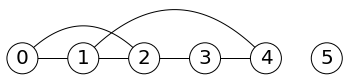

What I got prob3:  1 Expected: 1
What I got prob4:  6 Expected: 6
What I got prob5:  1 Expected: 1
What I got for display must be the same (prob6)
[[(1,1)(2,1)] [(0,1)(2,1)(4,1)] [(0,1)(1,1)(3,1)] [(2,1)(4,1)] [(3,1)(1,1)] [] ]
What I got prob8:  0 Expected: 0
What I got prob12:  False Expected: False
What I got prob12:  True Expected: True

[[(1,4)(2,3)] [] [(3,1)] [(4,5)] [(1,4)] [] ]


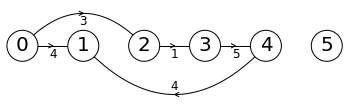

What I got prob3:  5 Expected: 5
What I got prob4:  5 Expected: 5
What I got prob5:  5 Expected: 5
Draw to test reverse_edge (prob6):


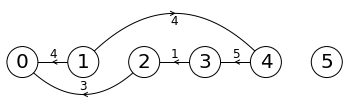

What I got prob8:  0 Expected: 0
What I got prob12:  False Expected: False
What I got prob12:  True Expected: True


AAAAAAAAAAMMMMMMMMMMM
[[0, 1, 1, 0, 0, 0], [1, 0, 0, 0, 1, 0], [1, 0, 0, 1, 0, 0], [0, 0, 1, 0, 1, 0], [0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 0]]
[[(1,1)(2,1)] [(0,1)(4,1)] [(0,1)(3,1)] [(2,1)(4,1)] [(1,1)(3,1)] [] ]


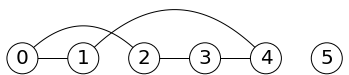

What I got prob3:  1 Expected: 1
What I got prob4:  5 Expected: 5
What I got prob5:  1 Expected: 1
What I got for display must be the same (prob6)
[[(1,1)(2,1)] [(0,1)(4,1)] [(0,1)(3,1)] [(2,1)(4,1)] [(1,1)(3,1)] [] ]
What I got prob8:  0 Expected: 0
What I got prob12:  False Expected: False
What I got prob12:  True Expected: True

[[0, 4, 3, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0], [0, 0, 0, 0, 5, 0], [0, 4, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0]]
[[(1,4)(2,3)] [] [(3,1)] [(4,5)] [(1,4)] [] ]


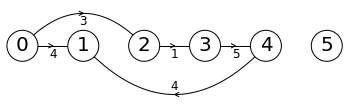

What I got prob3:  5 Expected: 5
What I got prob4:  5 Expected: 5
What I got prob5:  4 Expected: 4
Draw to test reverse_edge prob6:


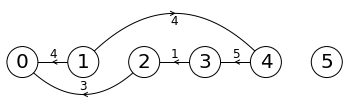

What I got prob7:  False Expected: False
What I got prob8:  0 Expected: 0
What I got prob12:  False Expected: False
What I got prob12:  True Expected: True


In [107]:
# YOUR TEST CASES GO HERE
print("AAAAAAAAAALLLLLLLLLL")
g = GraphAL(6)
g.insert_edge(0, 1)
g.insert_edge(0, 2)
g.insert_edge(1, 2)
g.insert_edge(2, 3)
g.insert_edge(3, 4)
g.insert_edge(4, 1)
g.display()
g.draw()
print("What I got prob3: ", g.get_highest_cost_edge(), "Expected: 1")
print("What I got prob4: ", g.num_edges(), "Expected: 6")
print("What I got prob5: ", g.edge_weight(1,2), "Expected: 1")
print("What I got for display must be the same (prob6)")
g.reverse_edges()
g.display()
print("What I got prob8: ", g.num_of_self_edges(), "Expected: 0")
print("What I got prob12: ", g.is_isolated(4), "Expected: False")
print("What I got prob12: ", g.is_isolated(5), "Expected: True")


print()

g1 = GraphAL(6, weighted=True, directed=True)
g1.insert_edge(0, 1, 4)
g1.insert_edge(0, 2, 3)
g1.insert_edge(1, 2, 2)
g1.insert_edge(2, 3, 1)
g1.insert_edge(3, 4, 5)
g1.insert_edge(4, 1, 4)
g1.delete_edge(1, 2)
g1.display()
g1.draw()
print("What I got prob3: ", g1.get_highest_cost_edge(), "Expected: 5")
print("What I got prob4: ", g1.num_edges(), "Expected: 5")
print("What I got prob5: ", g1.edge_weight(3,4), "Expected: 5")
g1.reverse_edges()
print("Draw to test reverse_edge (prob6):") 
g1.draw()
print("What I got prob8: ", g1.num_of_self_edges(), "Expected: 0")
print("What I got prob12: ", g1.is_isolated(4), "Expected: False")
print("What I got prob12: ", g1.is_isolated(5), "Expected: True")

print()
print()
print("AAAAAAAAAAMMMMMMMMMMM")
g2 = GraphAM(6)
g2.insert_edge(0, 1)
g2.insert_edge(0, 2)
g2.insert_edge(1, 2)
g2.insert_edge(2, 3)
g2.insert_edge(3, 4)
g2.insert_edge(4, 1)
g2.delete_edge(1, 2)
print(g2.am)
g2.display()
g2.draw()
print("What I got prob3: ", g2.get_highest_cost_edge(), "Expected: 1")
print("What I got prob4: ", g2.num_edges(), "Expected: 5")
print("What I got prob5: ", g2.edge_weight(0,2), "Expected: 1")
print("What I got for display must be the same (prob6)")
g2.reverse_edges()
g2.display()
print("What I got prob8: ", g2.num_of_self_edges(), "Expected: 0")
print("What I got prob12: ", g2.is_isolated(4), "Expected: False")
print("What I got prob12: ", g2.is_isolated(5), "Expected: True")

print()

g3 = GraphAM(6, weighted=True, directed=True)
g3.insert_edge(0, 1, 4)
g3.insert_edge(0, 2, 3)
g3.insert_edge(1, 2, 2)
g3.insert_edge(2, 3, 1)
g3.insert_edge(3, 4, 5)
g3.insert_edge(4, 1, 4)
g3.delete_edge(1, 2)
print(g3.am)
g3.display()
g3.draw()
print("What I got prob3: ", g3.get_highest_cost_edge(), "Expected: 5")
print("What I got prob4: ", g3.num_edges(), "Expected: 5")
print("What I got prob5: ", g3.edge_weight(4,1), "Expected: 4")
g3.reverse_edges()
print("Draw to test reverse_edge prob6:") 
g3.draw()
print("What I got prob7: ", g3.is_identical(g2), "Expected: False")
print("What I got prob8: ", g3.num_of_self_edges(), "Expected: 0")
print("What I got prob12: ", g3.is_isolated(4), "Expected: False")
print("What I got prob12: ", g3.is_isolated(5), "Expected: True")

## How to Submit 

1. File > Download .ipynb
2. Go to Blackboard, find the submission page, and upload the .ipynb file you just downloaded.